In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

<AxesSubplot:xlabel='salary'>

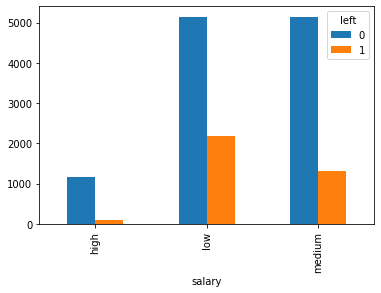

In [ ]:
df.groupby('left').mean()
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='number_project'>

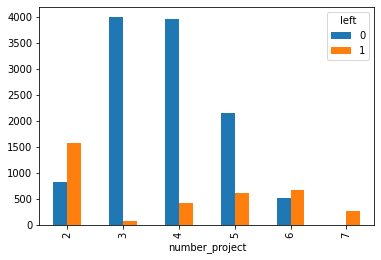

In [ ]:
pd.crosstab(df.number_project,df.left).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

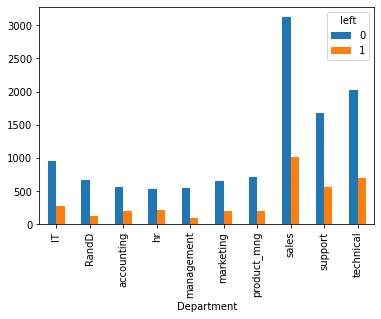

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')


In [ ]:

subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [ ]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [ ]:

df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
model.score(X_test,y_test)

0.782

In [ ]:
model.predict([[0.15, 300, 0, 0, 1, 0]])

array([1])

In [ ]:
model.predict([[0.45, 300, 0, 0, 0, 1]])

array([0])

In [ ]:
model.coef_

array([[-3.78147765e+00,  2.10558304e-03, -1.30866380e+00,
        -9.91230356e-01,  7.85471655e-01,  2.78665787e-01]])

In [ ]:
model.intercept_

array([0.0648768])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f46f3040-da69-4700-9777-62f3d4cb88ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>